# **Packages**

In [1]:
import numpy as np
import numpy.ma as ma
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import tabulate
from tensorflow.keras import layers
#from recsysNN_utils import *
pd.set_option("display.precision", 1)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
top10_df = pd.read_csv("/content/drive/Shareddrives/Capstone/Model_Recommender_System/data/top10.csv")
bygenre_df = pd.read_csv("/content/drive/Shareddrives/Capstone/Model_Recommender_System/data/bygenre.csv")
top10_df

,Places ID,num ratings,ave rating,nama,kategori
0,56,10,4.0,Solo Safari,Zoo
1,49,10,4.5,Pura Mangkunegaran,Historical
2,24,10,5.0,Kemuning Sky Hills,Nature & Adventure
3,52,10,3.5,Royal Water Adventure,Waterpark
4,30,9,4.5,Lawu Park Horse Riding,Nature & Adventure
5,35,8,5.0,Lokananta,Museum
6,11,8,5.0,Cepogo Cheese Park,Park
7,43,7,4.0,Nasi Liwet Yu Sani Gemblegan,Food
8,17,7,4.0,Gunung Lawu,Nature & Adventure
9,13,6,4.0,De Tjolomadoe,Museum


In [4]:
bygenre_df

,kategori,num places,ave rating/kategori,ratings per kategori
0,Nature & Adventure,32,4.5,13.5
1,Food,5,4.0,4.0
2,Zoo,1,4.0,4.0
3,Historical,7,4.5,4.5
4,Museum,10,4.5,9.0
5,Waterpark,7,3.5,3.5
6,Park,4,5.0,5.0


In [5]:
# Create user_train DataFrame
user_train = pd.DataFrame({
    'user_id': range(1, 11),
    'rating_count': [10, 10, 10, 10, 9, 8, 8, 7, 7, 6],
    'rating_ave': [4.0, 4.5, 5.0, 3.5, 4.5, 4.5, 5.0, 4.0, 4.0, 4.5],
    'Zoo': [4.0, 4.5, 5.0, 3.5, 4.0, 4.5, 5.0, 4.0, 4.5, np.nan],
    'Historical': [4.5, 5.0, 4.5, 4.0, 5.0, 4.5, np.nan, 4.5, 4.0, 4.0],
    'Nature & Adventure': [5.0, 4.5, 4.5, 3.5, 4.5, np.nan, 4.0, 4.0, 4.5, np.nan],
    'Waterpark': [3.5, 4.0, 4.5, 3.5, 4.0, np.nan, np.nan, 4.0, np.nan, np.nan],
    'Museum': [5.0, 4.5, 5.0, 4.0, 4.5, np.nan, 4.5, 4.0, np.nan, np.nan],
    'Food': [4.0, 4.5, 4.5, 3.5, np.nan, 4.5, 4.5, 4.0, 4.5, np.nan],
    'Park': [4.0, 4.5, 5.0, np.nan, 4.0, np.nan, 5.0, np.nan, 4.5, 4.5]
})

# Create item_train DataFrame
item_train = pd.DataFrame({
    'place_id': [56, 49, 24, 52, 30, 35, 11, 43, 17, 13],
    'num_ratings': [10, 10, 10, 10, 9, 8, 8, 7, 7, 6],
    'ave_rating': [4.0, 4.5, 5.0, 3.5, 4.5, 5.0, 5.0, 4.0, 4.0, 4.5],
    'name': ["Solo Safari", "Pura Mangkunegaran", "Kemuning Sky Hills", "Royal Water Adventure", "Lawu Park Horse Riding", "Lokananta", "Cepogo Cheese Park", "Nasi Liwet Yu Sani Gemblegan", "Gunung Lawu", "De Tjolomadoe"],
    'category': ["Zoo", "Historical", "Nature & Adventure", "Waterpark", "Nature & Adventure", "Museum", "Park", "Food", "Nature & Adventure", "Museum"]
})


print("User Train Data:")
print(user_train)
print("\nItem Train Data:")
print(item_train)

User Train Data:
   user_id  rating_count  rating_ave  Zoo  Historical  Nature & Adventure  \
0        1            10         4.0  4.0         4.5                 5.0   
1        2            10         4.5  4.5         5.0                 4.5   
2        3            10         5.0  5.0         4.5                 4.5   
3        4            10         3.5  3.5         4.0                 3.5   
4        5             9         4.5  4.0         5.0                 4.5   
5        6             8         4.5  4.5         4.5                 NaN   
6        7             8         5.0  5.0         NaN                 4.0   
7        8             7         4.0  4.0         4.5                 4.0   
8        9             7         4.0  4.5         4.0                 4.5   
9       10             6         4.5  NaN         4.0                 NaN   

   Waterpark  Museum  Food  Park  
0        3.5     5.0   4.0   4.0  
1        4.0     4.5   4.5   4.5  
2        4.5     5.0   4.5   5

In [6]:
from sklearn.model_selection import train_test_split

# Split user data terlebih dahulu
user_train, user_test = train_test_split(user_train, train_size=0.80, shuffle=True, random_state=1)

# Ekstrak kolom 'rating_ave' sebagai target setelah pembagian
y_train = user_train['rating_ave']
y_test = user_test['rating_ave']

# Hilangkan kolom 'rating_ave' dari data user agar tidak masuk sebagai fitur
user_train = user_train.drop(columns=['rating_ave'])
user_test = user_test.drop(columns=['rating_ave'])

# Lakukan transformasi (misalnya one-hot encoding) setelah splitting
user_train_encoded = pd.get_dummies(user_train, drop_first=True)
user_test_encoded = pd.get_dummies(user_test, drop_first=True)

# Pastikan semua kolom di user_train_encoded dan user_test_encoded konsisten
user_test_encoded = user_test_encoded.reindex(columns=user_train_encoded.columns, fill_value=0)

# Print shapes
print(f"user_train shape: {user_train_encoded.shape}")
print(f"user_test shape: {user_test_encoded.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


user_train shape: (8, 9)
user_test shape: (2, 9)
y_train shape: (8,)
y_test shape: (2,)


In [7]:
pd.DataFrame.isna(user_train).sum()

,0
user_id,0
rating_count,0
Zoo,0
Historical,1
Nature & Adventure,1
Waterpark,3
Museum,2
Food,1
Park,3


In [8]:
pd.DataFrame.isna(item_train).sum()

,0
place_id,0
num_ratings,0
ave_rating,0
name,0
category,0


In [9]:
for col in ['Zoo', 'Historical', 'Nature & Adventure', 'Waterpark', 'Museum', 'Food', 'Park']:
    mode_val = user_train[col].mode()[0]
    user_train.loc[:, col] = user_train[col].fillna(mode_val)

In [10]:
pd.DataFrame.isna(user_train).sum()

,0
user_id,0
rating_count,0
Zoo,0
Historical,0
Nature & Adventure,0
Waterpark,0
Museum,0
Food,0
Park,0


In [11]:
# Pisahkan kolom numerik dan non-numerik
numerical_cols = ['num_ratings', 'ave_rating']
non_numerical_cols = ['name', 'category']

In [12]:
# 1. Scale kolom numerik
scalerItem = StandardScaler()
numerical_scaled = scalerItem.fit_transform(item_train[numerical_cols])

# 2. One-hot encode kolom kategorikal
encoder_category = OneHotEncoder(sparse_output=False) # Create a separate encoder for category
encoded_categories = encoder_category.fit_transform(item_train[['category']])

encoder_name = OneHotEncoder(sparse_output=False) # Create a separate encoder for name
encoded_names = encoder_name.fit_transform(item_train[['name']])

# 3. Gabungkan kembali data yang sudah di-encode
item_train_processed = pd.concat(
    [
        pd.DataFrame(numerical_scaled, columns=numerical_cols),
        pd.DataFrame(encoded_categories, columns=encoder_category.get_feature_names_out(['category'])), # Use the correct encoder for category
        pd.DataFrame(encoded_names, columns=encoder_name.get_feature_names_out(['name'])) # Use the correct encoder for name
    ],
    axis=1
)

print(item_train_processed)

   num_ratings  ave_rating  category_Food  category_Historical  \
0          1.0        -0.8            0.0                  0.0   
1          1.0         0.2            0.0                  1.0   
2          1.0         1.2            0.0                  0.0   
3          1.0        -1.8            0.0                  0.0   
4          0.3         0.2            0.0                  0.0   
5         -0.3         1.2            0.0                  0.0   
6         -0.3         1.2            0.0                  0.0   
7         -1.0        -0.8            1.0                  0.0   
8         -1.0        -0.8            0.0                  0.0   
9         -1.7         0.2            0.0                  0.0   

   category_Museum  category_Nature & Adventure  category_Park  \
0              0.0                          0.0            0.0   
1              0.0                          0.0            0.0   
2              0.0                          1.0            0.0   
3        

In [13]:
# Gunakan DataFrame langsung alih-alih memanggil load_data()
# Assign DataFrame yang telah dibuat
item_train = item_train  # Data tempat wisata
user_train = user_train  # Data pengguna

# Contoh 'y_train' dapat dibuat dengan dummy data atau label rating sebenarnya
#y_train = user_train['rating_ave']  # Contoh mengambil rata-rata rating sebagai label target

# Fitur tambahan (bisa disesuaikan dengan model)
item_features = item_train[['category']]
user_features = user_train.drop(columns=['user_id', 'rating_count'])

# Set konfigurasi variabel
num_user_features = user_train.shape[1] - 3  # Menghapus 'userid', 'rating_count', dan 'rating_ave' saat training
num_item_features = item_train.shape[1] - 1  # Menghapus 'place_id' saat training
uvs = 3  # User genre vector start
ivs = 3  # Item genre vector start
u_s = 3  # Kolom awal untuk training pengguna
i_s = 1  # Kolom awal untuk training tempat wisata

print(f"Number of training vectors: {len(item_train)}")

Number of training vectors: 10


In [14]:
def pprint_train(user_train, user_features, uvs, u_s, maxcount=10):
    """
    Pretty-print training data for debugging or inspection.

    Args:
        user_train: DataFrame of user training data.
        user_features: Features associated with each user.
        uvs: Start index of user genre vector in features.
        u_s: Start index of columns used for training.
        maxcount: Maximum number of rows to print.
    """
    print("User Training Data Preview:")
    print(user_train.head(maxcount))
    print("\nUser Features Preview:")
    print(user_features.iloc[:, uvs:u_s].head(maxcount))  # Slicing based on uvs and u_s

# Menggunakan fungsi
pprint_train(user_train, user_features, uvs, u_s, maxcount=10)


User Training Data Preview:
   user_id  rating_count  Zoo  Historical  Nature & Adventure  Waterpark  \
6        7             8  5.0         4.5                 4.0        4.0   
4        5             9  4.0         5.0                 4.5        4.0   
0        1            10  4.0         4.5                 5.0        3.5   
3        4            10  3.5         4.0                 3.5        3.5   
1        2            10  4.5         5.0                 4.5        4.0   
7        8             7  4.0         4.5                 4.0        4.0   
8        9             7  4.5         4.0                 4.5        4.0   
5        6             8  4.5         4.5                 4.5        4.0   

   Museum  Food  Park  
6     4.5   4.5   5.0  
4     4.5   4.5   4.0  
0     5.0   4.0   4.0  
3     4.0   3.5   4.0  
1     4.5   4.5   4.5  
7     4.0   4.0   4.0  
8     4.5   4.5   4.5  
5     4.5   4.5   4.0  

User Features Preview:
Empty DataFrame
Columns: []
Index: [6, 4, 0, 3,

In [15]:
def pprint_train(item_train, item_features, ivs, i_s, maxcount=10, user=False):
    """
    Pretty-print training data for debugging or inspection.

    Args:
        user_train: DataFrame of user training data.
        user_features: Features associated with each user.
        uvs: Start index of user genre vector in features.
        u_s: Start index of columns used for training.
        maxcount: Maximum number of rows to print.
    """
    print("User Training Data Preview:")
    print(item_train.head(maxcount))
    print("\nUser Features Preview:")
    print(item_features.iloc[:, ivs:i_s].head(maxcount))  # Slicing based on uvs and u_s

# Menggunakan fungsi
pprint_train(item_train, item_features, ivs, i_s, maxcount=10, user=False)


User Training Data Preview:
   place_id  num_ratings  ave_rating                          name  \
0        56           10         4.0                   Solo Safari   
1        49           10         4.5            Pura Mangkunegaran   
2        24           10         5.0            Kemuning Sky Hills   
3        52           10         3.5         Royal Water Adventure   
4        30            9         4.5        Lawu Park Horse Riding   
5        35            8         5.0                     Lokananta   
6        11            8         5.0            Cepogo Cheese Park   
7        43            7         4.0  Nasi Liwet Yu Sani Gemblegan   
8        17            7         4.0                   Gunung Lawu   
9        13            6         4.5                 De Tjolomadoe   

             category  
0                 Zoo  
1          Historical  
2  Nature & Adventure  
3           Waterpark  
4  Nature & Adventure  
5              Museum  
6                Park  
7        

In [16]:
print(f"y_train[:10]:\n {y_train[:10]}")

y_train[:10]:
 6    5.0
4    4.5
0    4.0
3    3.5
1    4.5
7    4.0
8    4.0
5    4.5
Name: rating_ave, dtype: float64


In [17]:
pprint_train(user_train, user_features, uvs, u_s, maxcount=5)

User Training Data Preview:
   user_id  rating_count  Zoo  Historical  Nature & Adventure  Waterpark  \
6        7             8  5.0         4.5                 4.0        4.0   
4        5             9  4.0         5.0                 4.5        4.0   
0        1            10  4.0         4.5                 5.0        3.5   
3        4            10  3.5         4.0                 3.5        3.5   
1        2            10  4.5         5.0                 4.5        4.0   

   Museum  Food  Park  
6     4.5   4.5   5.0  
4     4.5   4.5   4.0  
0     5.0   4.0   4.0  
3     4.0   3.5   4.0  
1     4.5   4.5   4.5  

User Features Preview:
Empty DataFrame
Columns: []
Index: [6, 4, 0, 3, 1]


In [18]:
user_train_numeric = pd.DataFrame({'col1': [1, 2, 3, 4, 5],
                                   'col2': [6, 7, 8, 9, 10],
                                   'col3': [11, 12, 13, 14, 15],
                                   'col4': [16, 17, 18, 19, 20]})
item_train_numeric = pd.DataFrame({'col1': [1, 2, 3, 4, 5],
                                   'col2': [6, 7, 8, 9, 10],
                                   'col3': [11, 12, 13, 14, 15],
                                   'col4': [16, 17, 18, 19, 20]})

In [19]:
import tensorflow as tf
import pandas as pd
import numpy as np


# Dummy data untuk memastikan fitur dan label sesuai
num_user_features = 4
num_item_features = 4
num_samples = 100

# Buat data dummy
user_train_numeric = np.random.rand(num_samples, num_user_features).astype('float32')
item_train_numeric = np.random.rand(num_samples, num_item_features).astype('float32')
y_train = np.random.randint(2, size=num_samples).astype('float32')

# Bagi data menjadi train dan test
from sklearn.model_selection import train_test_split
user_train, user_test, item_train, item_test, y_train, y_test = train_test_split(
    user_train_numeric, item_train_numeric, y_train, test_size=0.2, random_state=1
)


# Redefine the model (if necessary)
num_outputs = 16
user_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(num_outputs),
])

item_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dense(num_outputs),
])

# User input and base network
input_user = tf.keras.layers.Input(shape=(num_user_features,))
vu = user_NN(input_user)
vu = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vu)

# Item input and base network
input_item = tf.keras.layers.Input(shape=(num_item_features,))
vm = item_NN(input_item)
vm = tf.keras.layers.Lambda(lambda x: tf.linalg.l2_normalize(x, axis=1))(vm)

# Dot product of user and item embeddings
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# Create the model
model = tf.keras.Model([input_user, input_item], output)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 4)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_layer_2             │ (None, 4)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential (Sequential)   │ (None, 16)             │          2,928 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ sequential_1 (Sequential) │ (None, 16)             │          2,928 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda (Lambda)           │ (None, 16)             │              0 │ sequential[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ lambda_1 (Lambda)         │ (None, 16)             │              0 │ sequential_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dot (Dot)                 │ (None, 1)              │              0 │ lambda[0][0],          │
│                           │                        │                │ lambda_1[0][0]         │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 5,856 (22.88 KB)

 Trainable params: 5,856 (22.88 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - accuracy: 0.4479 - loss: 4.7720 - val_accuracy: 0.5000 - val_loss: 2.9410
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4125 - loss: 3.4428 - val_accuracy: 0.5625 - val_loss: 1.1758
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4917 - loss: 3.2330 - val_accuracy: 0.5625 - val_loss: 0.9408
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3979 - loss: 2.7376 - val_accuracy: 0.5625 - val_loss: 0.8329
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4542 - loss: 2.2803 - val_accuracy: 0.5625 - val_loss: 0.7756
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.5604 - loss: 1.7396 - val_accuracy: 0.6250 - val_loss: 0.7450
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.4104 - loss: 2.1379 - val_accuracy: 0.6250 - val_loss: 0.7253
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.4854 - loss: 1.0120 - val_accuracy: 0.6250 - val_loss

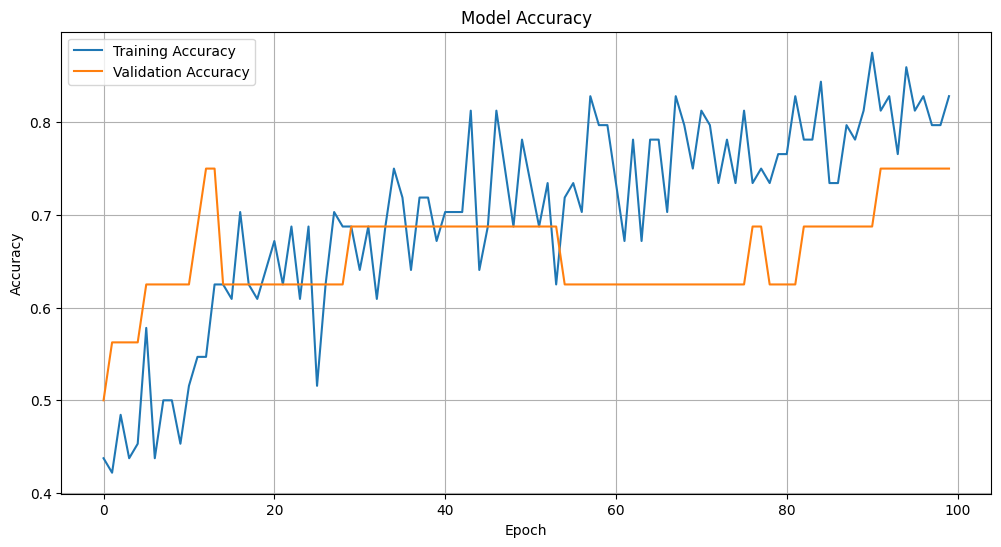

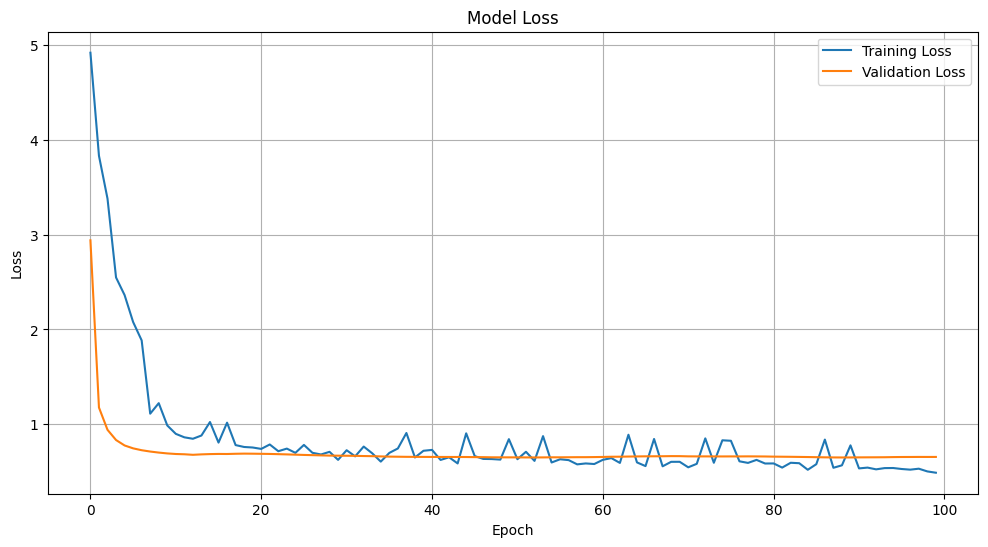

In [20]:
#1
import matplotlib.pyplot as plt

# Normalisasi data
scaler_user = StandardScaler()
scaler_item = StandardScaler()

user_train_normalized = scaler_user.fit_transform(user_train)
user_test_normalized = scaler_user.transform(user_test)

item_train_normalized = scaler_item.fit_transform(item_train)
item_test_normalized = scaler_item.transform(item_test)

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=1e-6,  # Perubahan minimum untuk dianggap "peningkatan"
    patience=50,     # Jumlah epoch sebelum berhenti jika tidak ada perbaikan
    restore_best_weights=True
)

history = model.fit(
    [user_train_normalized, item_train_normalized],
    y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stopping]
)


# Plot hasil
history_data = history.history

# Plot akurasi
plt.figure(figsize=(12, 6))
plt.plot(history.epoch, history.history['accuracy'], label='Training Accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.grid()
plt.show()

# Plot loss
plt.figure(figsize=(12, 6))
plt.plot(history.epoch, history.history['loss'], label='Training Loss')
plt.plot(history.epoch, history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid()
plt.show()


In [21]:
# Pastikan user_test dan item_test sudah berupa numpy.ndarray
# Jika sudah numpy.ndarray, langsung gunakan:
user_test_np = np.nan_to_num(user_test).astype('float32')  # Mengganti NaN dengan 0 dan memastikan tipe float32
item_test_np = np.nan_to_num(item_test).astype('float32')

# Konversi y_test jika diperlukan
y_test_np = np.array(y_test).astype('float32')

# Sesuaikan jumlah fitur berdasarkan input model
num_user_features = 7  # Misalnya jumlah fitur untuk user
num_item_features = 4  # Misalnya jumlah fitur untuk item


test_loss, test_accuracy = model.evaluate([user_test_normalized, item_test_normalized], y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.4500 - loss: 1.6662
Test Loss: 1.6662, Test Accuracy: 0.4500
